Scrape the data from [this website on CO2 emissions by country](https://www.worldometers.info/co2-emissions/co2-emissions-by-country/). 

Develop a Monte Carlo bootstrap simulation procedure to construct a confidence interval for the two linear regression parameters (intercept and slope) using the scraped data. Assume your response variable (y) is CO2 Emissions (tons, 2016) and your covariate (x) is Population (2016).

1. Write a function called `mcsim(df,N,alpha)` which takes as inputs the `Pandas` dataframe `df` you have scraped, the number `N` of Monte Carlo simulations you require, and the confidence level `alpha`. The function should resample the data `N` times, fit a linear model to each new dataset, and store the estimates of intercept and slope. The function should then return a `Pandas` dataframe output with two columns, 'Intercept' and 'Slope', with the rows being the `N` estimates of the parameters. 

2. Run your function for all combinations of $N\in[100,500,1000]$ and $\alpha\in[0.01,0.05,0.1]$ and store as a dictionary where the keys are of the form `N_alpha`. Produce histograms of your outputs for each combination as subplots in a figure. The rows of subfigures should be increasing N and the columns increasing $\alpha$.

3. Calculate the confidence region for each setting and save to a python dictionary object called `confint`, where the rows are increasing sizes of `N` and the columns are increasing `alpha` and keys are of the form `N_alpha`. 

4. Fit a linear model to the original dataset and extract the exact confidence interval for the two parameters. 

5. Add vertical lines to the histogram to show the exact and approximate regions clearly in different colours and/or line types. Each plot title should portray what the setting values are for that plot.

6. Write a short description (no more than 150 words) on your procedure and comparing your MC estimates with this exact interval in the box below.

In [3]:
#Your Python data scraping code here

import requests
import pandas as pd
from bs4 import BeautifulSoup

page = requests.get('https://www.worldometers.info/co2-emissions/co2-emissions-by-country/') 
soup = BeautifulSoup(page.content, 'html.parser')

# selecting the required table of data from the webpage

table = soup.select_one('table', id='example2')
    
# extracting the data from the table body

tbody = table.select("tbody tr td")

co2_emissions = []
population = []

# segregating all the columns from tbody

for i in range(209):
    co2_emissions.append(float(tbody[7*i+2].text.replace(',', '')))
    population.append(float(tbody[7*i+4].text.replace(',', '')))

data = {'col1': co2_emissions, 'col2': population}

# creating a pandas dataframe from the webpage data

df = pd.DataFrame(data)

df.columns=[f"CO2 Emissions (tons, 2016)", "Population"]

df

,"CO2 Emissions (tons, 2016)",Population
0,1.043275e+10,1.401890e+09
1,5.011687e+09,3.272102e+08
2,2.533638e+09,1.338636e+09
3,1.661899e+09,1.451092e+08
4,1.239592e+09,1.269939e+08
...,...,...
204,3.026200e+04,1.481300e+04
205,1.312800e+04,5.510000e+03
206,8.842000e+03,5.965000e+03
207,1.953000e+03,4.950000e+04


C:\Users\kriti\AppData\Local\Temp\ipykernel_22940\2538023898.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta0[i] = res.params[0]
C:\Users\kriti\AppData\Local\Temp\ipykernel_22940\2538023898.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1[i] = res.params[1]
C:\Users\kriti\AppData\Local\Temp\ipykernel_22940\2538023898.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta0[i] = res.params[0]
C:\Users\kriti\AppD

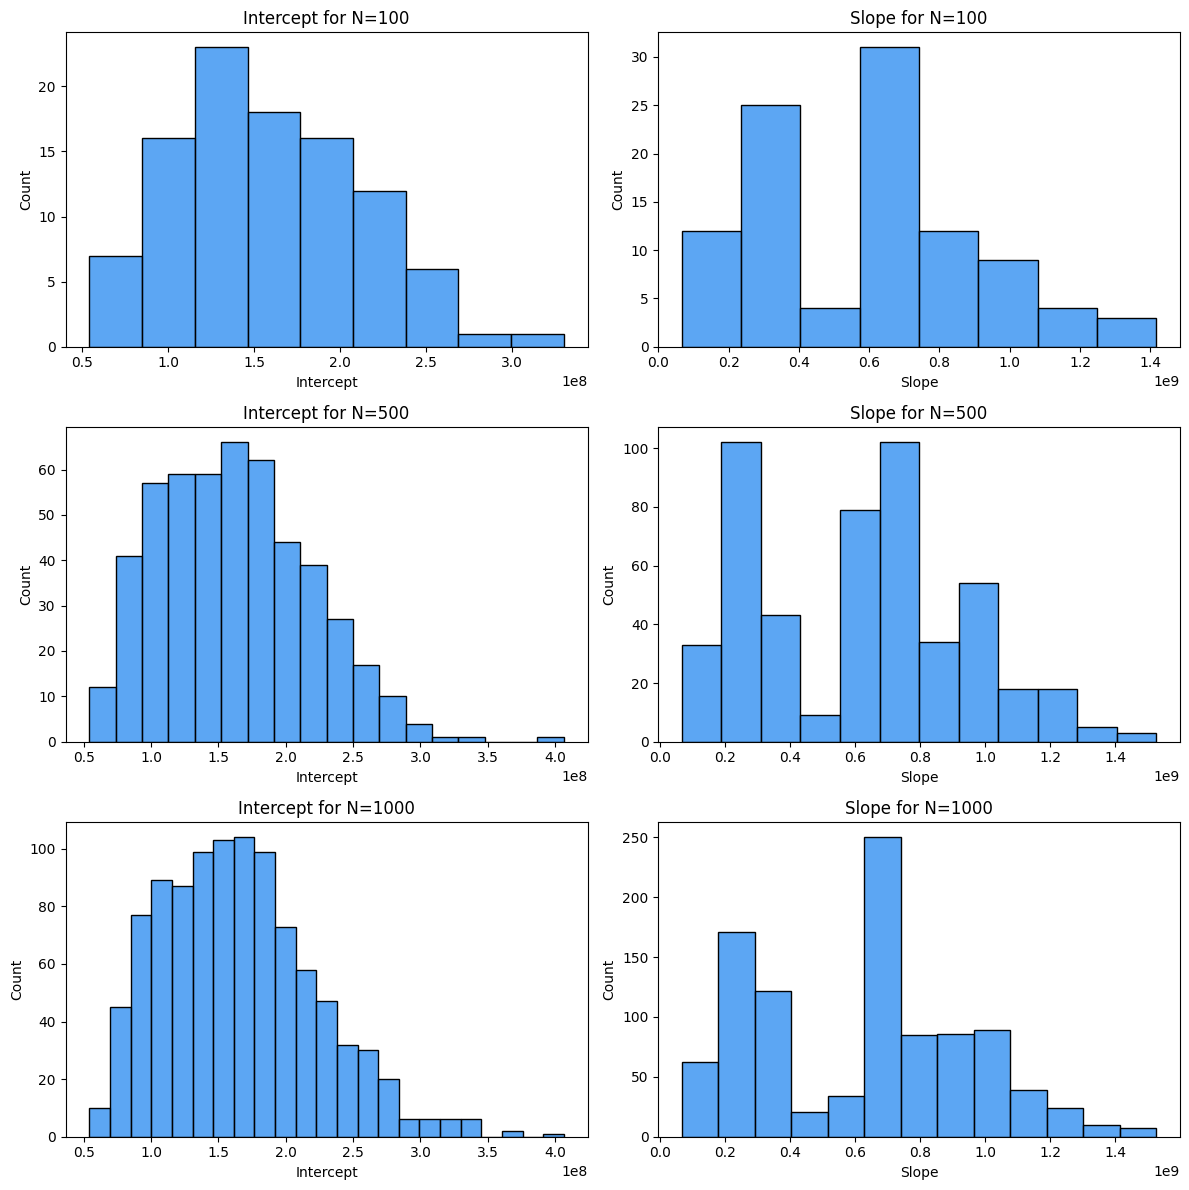

C:\Users\kriti\AppData\Local\Temp\ipykernel_22940\2538023898.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  CI_beta0 = {0.01: [res.conf_int(0.01)[0][0], res.conf_int(0.01)[1][0]], 0.05: [res.conf_int(0.05)[0][0], res.conf_int(0.05)[1][0]], 0.1: [res.conf_int(0.1)[0][0], res.conf_int(0.1)[1][0]]}
C:\Users\kriti\AppData\Local\Temp\ipykernel_22940\2538023898.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  CI_beta1 = {0.01: [res.conf_int(0.01)[0][1], res.conf_int(0.01)[1][1]], 0.05: [res.conf_int(0.05)[0][1], res.conf_int(0.05)[1][1]], 0.1: [res.conf_int(0.1)[0][1], res.conf_int(0.1)[1][1]]}


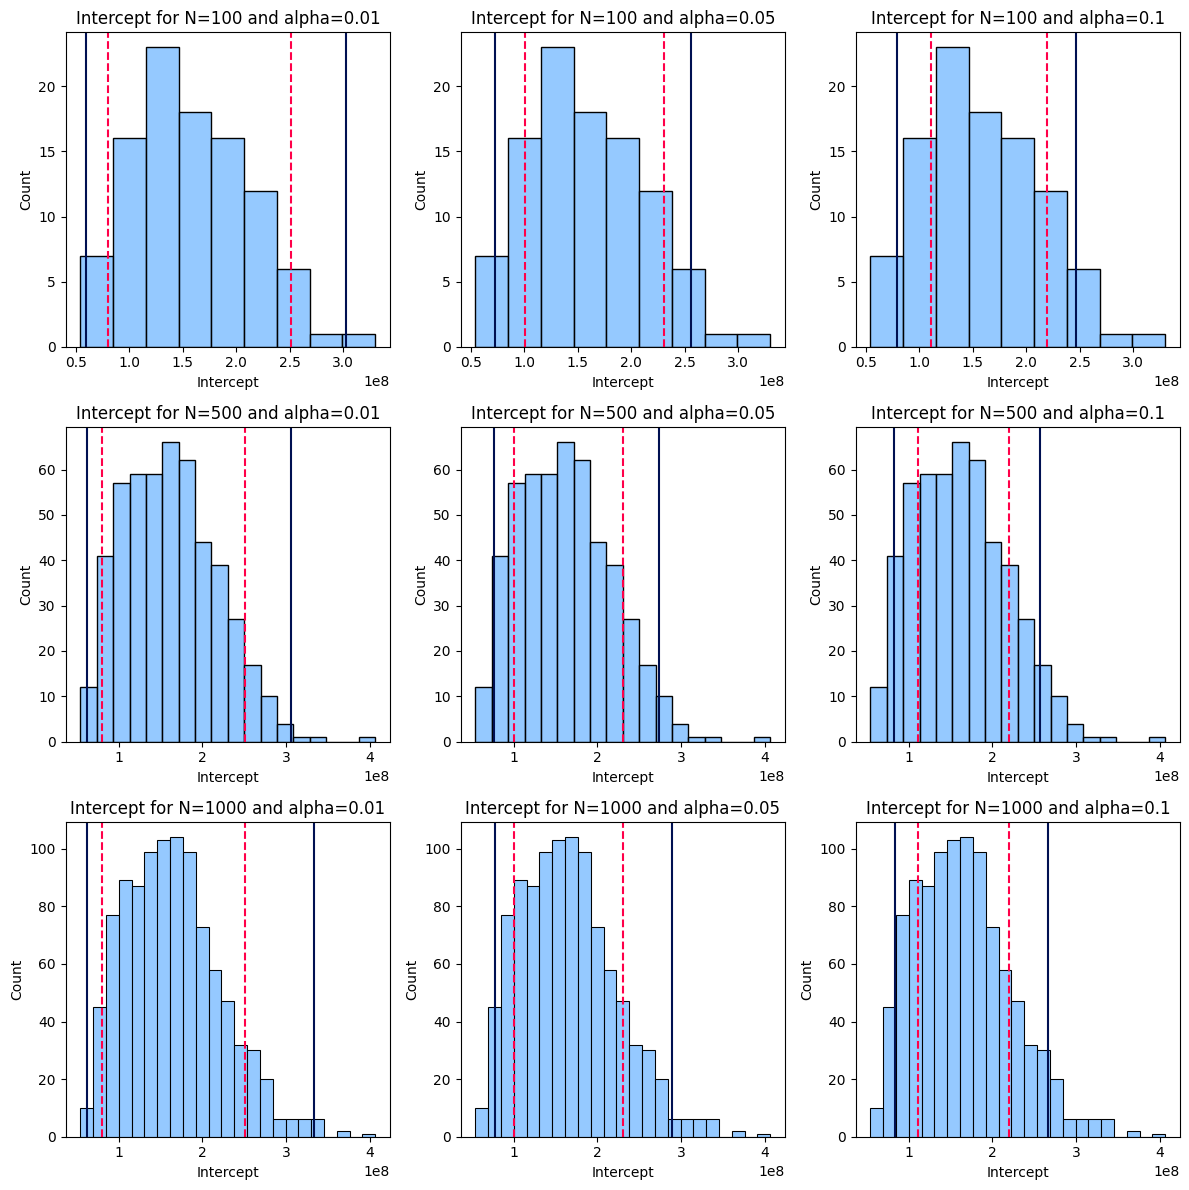

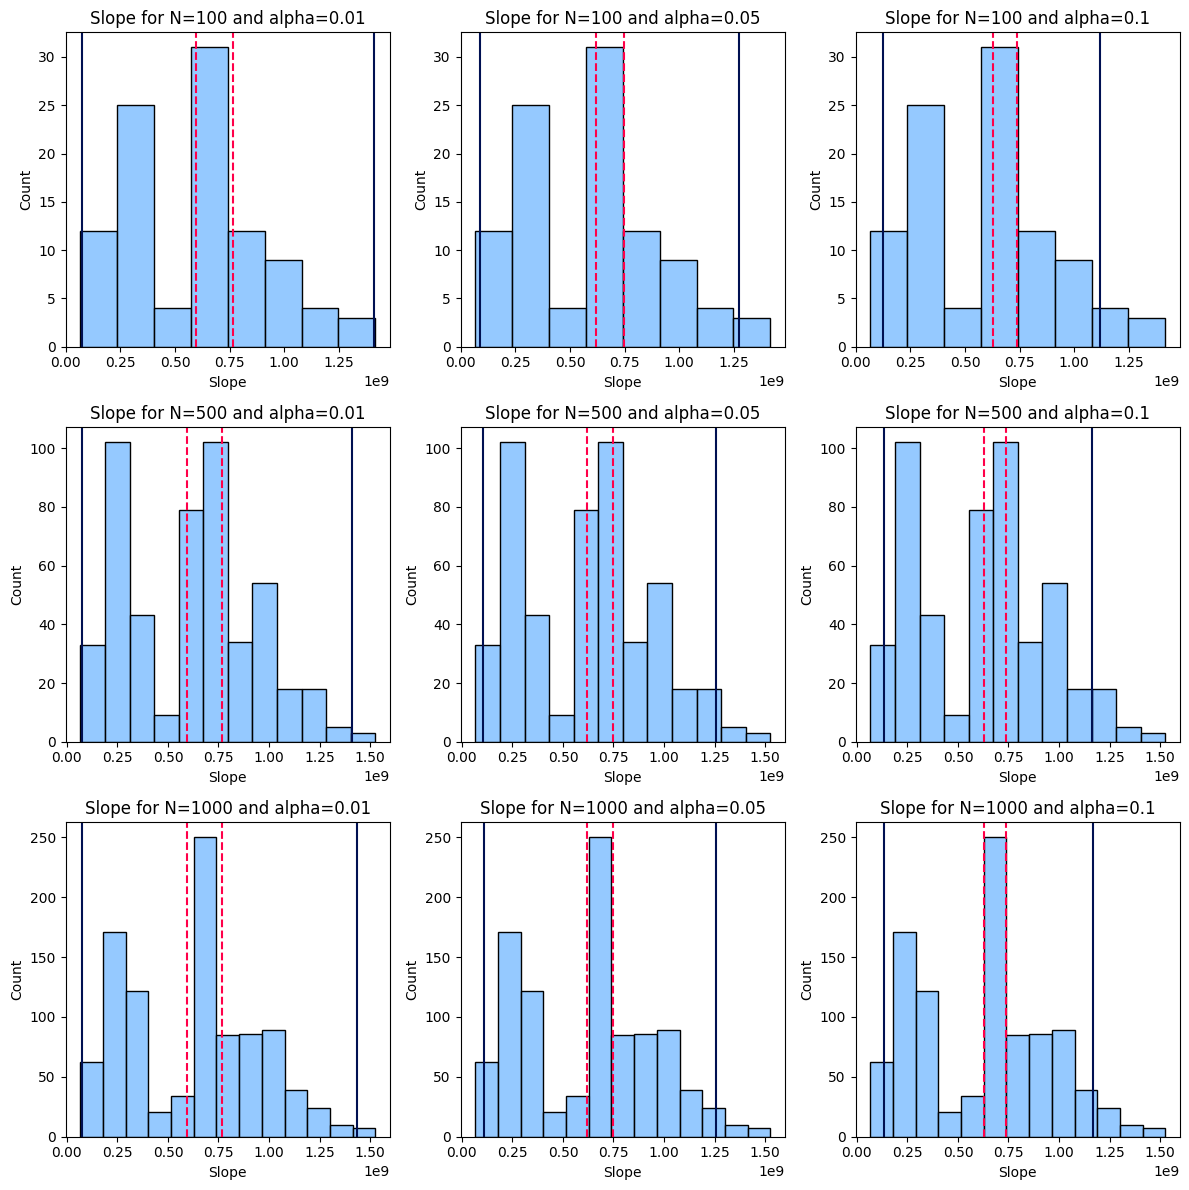

In [7]:
#Your MC simulation code here

import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# creating the mcsim function

def mcsim(df,N):
    nrand = N
    nsamp = df.shape[0]
    newsamp = np.random.choice(range(nsamp), size=nsamp, replace=True)
    newdat = df.iloc[newsamp, :]
    beta0 = np.zeros(nrand)
    beta1 = np.zeros(nrand)
    
    # using non-parametric bootstrapping

    for i in range(nrand):
        
        #setting random seed every time
        
        np.random.seed(12345+i)
        
        newsamp = np.random.choice(range(nsamp), size=nsamp, replace=True)
        newdat = df.iloc[newsamp, :]
        
        # performing a regression for the new sample
        
        x0 = newdat.iloc[:,1]
        x1 = (x0-x0.mean())/x0.std()
        X = sm.add_constant(x1)
        y = newdat.iloc[:,0]
        mod = sm.OLS(y, X)
        res = mod.fit()
        beta0[i] = res.params[0]
        beta1[i] = res.params[1]
        
    # creating a dataframe to store the required coefficient values
    
    data = {'col1': beta0, 'col2': beta1}
    regression_df = pd.DataFrame(data)
    regression_df.columns=["Intercept", "Slope"]
    
    return regression_df

# creating a histogram for all values of the intercept and slope coefficients for different values of N

alpha_list = [0.01, 0.05, 0.1]
N_list = [100, 500, 1000]

hist_dict = {100: mcsim(df, 100), 500: mcsim(df, 500), 1000: mcsim(df, 1000)}

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

for i, N in enumerate(N_list):
    for j, coef in enumerate(['Intercept', 'Slope']):
        sns.histplot(data=hist_dict[N], x=coef, ax=axes[i][j], color = '#2689EF')
        axes[i][j].set_title(f"{coef} for N={N}")
        
plt.tight_layout()
plt.show()

# creating confidence intervals using a nested dict for given values of N and alpha

confint = {
    100: {
        0.01: np.array([np.quantile(hist_dict[100].iloc[:,0], q=[0.005, 0.995]), np.quantile(hist_dict[100].iloc[:,1], q=[0.005, 0.995])]),
        0.05: np.array([np.quantile(hist_dict[100].iloc[:,0], q=[0.025, 0.975]), np.quantile(hist_dict[100].iloc[:,1], q=[0.025, 0.975])]),
        0.1: np.array([np.quantile(hist_dict[100].iloc[:,0], q=[0.05, 0.95]), np.quantile(hist_dict[100].iloc[:,1], q=[0.05, 0.95])]),
    },
    500: {
        0.01: np.array([np.quantile(hist_dict[500].iloc[:,0], q=[0.005, 0.995]), np.quantile(hist_dict[500].iloc[:,1], q=[0.005, 0.995])]),
        0.05: np.array([np.quantile(hist_dict[500].iloc[:,0], q=[0.025, 0.975]), np.quantile(hist_dict[500].iloc[:,1], q=[0.025, 0.975])]),
        0.1: np.array([np.quantile(hist_dict[500].iloc[:,0], q=[0.05, 0.95]), np.quantile(hist_dict[500].iloc[:,1], q=[0.05, 0.95])]),
    },
    1000: {
        0.01: np.array([np.quantile(hist_dict[1000].iloc[:,0], q=[0.005, 0.995]), np.quantile(hist_dict[1000].iloc[:,1], q=[0.005, 0.995])]),
        0.05: np.array([np.quantile(hist_dict[1000].iloc[:,0], q=[0.025, 0.975]), np.quantile(hist_dict[1000].iloc[:,1], q=[0.025, 0.975])]),
        0.1: np.array([np.quantile(hist_dict[1000].iloc[:,0], q=[0.05, 0.95]), np.quantile(hist_dict[1000].iloc[:,1], q=[0.05, 0.95])]),
    },
    }

# creating confidence intervals using the original dataset

x0 = df.iloc[:,1]
X1 = (x0-x0.mean())/x0.std()
X = sm.add_constant(X1)
y = df.iloc[:,0]
mod = sm.OLS(y, X)
res = mod.fit()
coef = res.params
CI_beta0 = {0.01: [res.conf_int(0.01)[0][0], res.conf_int(0.01)[1][0]], 0.05: [res.conf_int(0.05)[0][0], res.conf_int(0.05)[1][0]], 0.1: [res.conf_int(0.1)[0][0], res.conf_int(0.1)[1][0]]}
CI_beta1 = {0.01: [res.conf_int(0.01)[0][1], res.conf_int(0.01)[1][1]], 0.05: [res.conf_int(0.05)[0][1], res.conf_int(0.05)[1][1]], 0.1: [res.conf_int(0.1)[0][1], res.conf_int(0.1)[1][1]]}

# creating histograms with N and alpha for intercept

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
for i, N in enumerate(N_list):
    for j, alpha in enumerate(alpha_list):
        ax = axes[i][j]
        sns.histplot(data=hist_dict[N], x='Intercept', ax=ax, color = '#72B7FF')
        ax.set_title(f"Intercept for N={N} and alpha={alpha}")
        ax.axvline(confint[N][alpha][0][0], color='#001052')
        ax.axvline(confint[N][alpha][0][1], color='#001052')
        ax.axvline(CI_beta0[alpha][0], color='#FF0049', linestyle='--')
        ax.axvline(CI_beta0[alpha][1], color='#FF0049', linestyle='--')
plt.tight_layout()
plt.show()

# creating histograms with N and alpha for slope

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
for i, N in enumerate(N_list):
    for j, alpha in enumerate(alpha_list):
        ax = axes[i][j]
        sns.histplot(data=hist_dict[N], x='Slope', ax=ax, color = '#72B7FF')
        ax.set_title(f"Slope for N={N} and alpha={alpha}")
        ax.axvline(confint[N][alpha][1][0], color='#001052')
        ax.axvline(confint[N][alpha][1][1], color='#001052')
        ax.axvline(CI_beta1[alpha][0], color='#FF0049', linestyle='--')
        ax.axvline(CI_beta1[alpha][1], color='#FF0049', linestyle='--')
plt.tight_layout()
plt.show()

*Answer:*

*Bootstrapping resamples a dataset to create many simulated sample datasets, which is asymptotically more accurate than using sample variance and assuming normality for calculating standard errors and confidence intervals.*

*The function `mcsim` conducts a non-parametric bootstrap N times and generates a standard normal distribution to standardise the independent variable (Monte Carlo simulation). It then performs a regression and stores the intercepts and slopes. The histograms show the distribution of the slope and intercept for different values of N and the confidence intervals of both the original dataset and the bootstrap.*

*The confidence intervals from the bootstrap are much wider than those from the original dataset for all N and alpha. This is because bootstrap intervals account for the sampling variability of the data. Moreover, due to resampling, there is more uncertainty with respect to estimates and there may be more extreme values. The confidence intervals from the original data roughly lie in the centre of the distribution of the bootstrap samples.*
